<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/Copy_of_INTRUSION_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **INTRUSION DETECTION**

In [ ]:
#importing required packages for this module
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
import json
jsonpath=Path('/content/drive/MyDrive/Mini Project/datasetnew.json')
with jsonpath.open('r',encoding='utf-8')as dat_f:
  dat=json.loads(dat_f.read())
  df=pd.json_normalize(dat)
  df.to_csv('/content/drive/MyDrive/Mini Project/logdataset1.csv',encoding='utf-8',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Mini Project/newlogdataset.csv")
data

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,interface_ip,segment_id,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4171,322,nvd,2019-11-29T12:11:06.587Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,c9845596-2a1c-40fa-ba73-1a3cb250e988,3
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4181,322,nvd,2019-11-29T12:11:06.589Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,a3e78117-f02b-4a58-9194-39b8c153b1fb,3
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4138,322,nvd,2019-11-29T12:11:06.413Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4128,322,nvd,2019-11-29T12:11:06.406Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,9c819b01-6e5c-4985-92a6-132c98cb6f63,3
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4227,322,nvd,2019-11-29T12:11:06.41Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.144Z,40,CVE-2016-0995,237,nvd,2019-11-27T03:09:30.037Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,d1634d4f-c262-4484-9a10-3939743a8ca5,3
2496,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-1031,237,nvd,2019-11-27T03:09:30.207Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,9ab8684a-bec1-4dd4-8688-e698f107d038,3
2497,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-4284,237,nvd,2019-11-27T03:09:30.212Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,85110b00-ce52-4cfd-9b38-1ff1ea9452ed,3
2498,1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-27T03:12:01.143Z,40,CVE-2016-4284,237,nvd,2019-11-27T03:09:30.212Z,...,192.168.168.20,-1.428828e+09,271,18,Unresolved,windows,1,2,85110b00-ce52-4cfd-9b38-1ff1ea9452ed,3


In [ ]:
ds=data[['process_path','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:

ds

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],40,27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],40,27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],40,27.0


In [ ]:
inp=ds.drop(["report_score"],axis=1)
inp

,process_path,alert_type,@timestamp,watchlist_id,tags,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],27.0
...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0


In [ ]:
ds.dtypes

process_path       object
alert_type         object
@timestamp         object
watchlist_id       object
tags               object
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df=ds

**PREPROCESSING**

Object datatype is converted into integer

In [ ]:
X = df.select_dtypes(include=[object])
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(X)

# 3. Transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

(2500, 83)

In [ ]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [ ]:
#Preprocessing
#applying the labelencoder for datatype convertion
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder(sparse=False)
df['process_path']=onehot_encoder.fit_transform(df[['process_path']])
df['alert_type']=onehot_encoder.fit_transform(df[['alert_type']])
df['@timestamp']=onehot_encoder.fit_transform(df[['@timestamp']])
df['watchlist_id']=onehot_encoder.fit_transform(df[['watchlist_id']])
df['tags']=onehot_encoder.fit_transform(df[['tags']])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df.dtypes

process_path      float64
alert_type        float64
@timestamp        float64
watchlist_id      float64
tags              float64
report_score        int64
alert_severity    float64
dtype: object

In [ ]:
df

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0.0,1.0,0.0,0.0,1.0,40,27.0
1,0.0,1.0,0.0,0.0,1.0,40,27.0
2,0.0,1.0,0.0,0.0,1.0,40,27.0
3,0.0,1.0,0.0,0.0,1.0,40,27.0
4,0.0,1.0,0.0,0.0,1.0,40,27.0
...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,1.0,40,27.0
2496,0.0,1.0,1.0,0.0,1.0,40,27.0
2497,0.0,1.0,1.0,0.0,1.0,40,27.0
2498,0.0,1.0,1.0,0.0,1.0,40,27.0


In [ ]:
import pickle


In [ ]:
# save the model to disk
filename = 'onehotencodermodeln1.pkl'
pickle.dump(onehot_encoder, open(filename, 'wb'))

In [ ]:
df

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0.0,1.0,0.0,0.0,1.0,40,27.0
1,0.0,1.0,0.0,0.0,1.0,40,27.0
2,0.0,1.0,0.0,0.0,1.0,40,27.0
3,0.0,1.0,0.0,0.0,1.0,40,27.0
4,0.0,1.0,0.0,0.0,1.0,40,27.0
...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,1.0,40,27.0
2496,0.0,1.0,1.0,0.0,1.0,40,27.0
2497,0.0,1.0,1.0,0.0,1.0,40,27.0
2498,0.0,1.0,1.0,0.0,1.0,40,27.0


In [ ]:
df.loc[(df['report_score'] >=10) & (df['report_score'] <= 39), 'class'] = "LowRisk"  
df.loc[(df['report_score'] >=40) & (df['report_score'] <= 69), 'class'] = "MediumRisk" 
df.loc[(df['report_score'] >=70) & (df['report_score'] <= 89), 'class'] = "HighRisk" 
df.loc[(df['report_score'] >=90) & (df['report_score'] <= 100), 'class'] = "Critical" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='HighRisk':
        return 2
    elif report_score=='Critical':
        return 3

In [ ]:
df['class'] = df['class'].apply(cdc)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,0.0,1.0,0.0,0.0,1.0,40,27.0,1
1,0.0,1.0,0.0,0.0,1.0,40,27.0,1
2,0.0,1.0,0.0,0.0,1.0,40,27.0,1
3,0.0,1.0,0.0,0.0,1.0,40,27.0,1
4,0.0,1.0,0.0,0.0,1.0,40,27.0,1
...,...,...,...,...,...,...,...,...
2495,0.0,1.0,0.0,0.0,1.0,40,27.0,1
2496,0.0,1.0,1.0,0.0,1.0,40,27.0,1
2497,0.0,1.0,1.0,0.0,1.0,40,27.0,1
2498,0.0,1.0,1.0,0.0,1.0,40,27.0,1


In [ ]:
df.dtypes

process_path      float64
alert_type        float64
@timestamp        float64
watchlist_id      float64
tags              float64
report_score        int64
alert_severity    float64
class               int64
dtype: object

In [ ]:
x=df.drop(["class","report_score"],axis=1)
y=df["class"]

Scaling Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)


Splitting the model

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333]])

**MODELS** 

In [ ]:

#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)


In [ ]:

sv.score(x_test,y_test)

0.898

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)

In [ ]:
knn_clf.score(x_test,y_test)

0.898

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)



In [ ]:
rf.score(x_test,y_test)

0.9

In [ ]:
# save the model to disk
filename = 'randomforestmodelc1'
pickle.dump(rf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9


In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.832

In [ ]:
#Applying logistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)



In [ ]:
lr.score(x_test,y_test)

0.86

**MODEL EVALUATION**

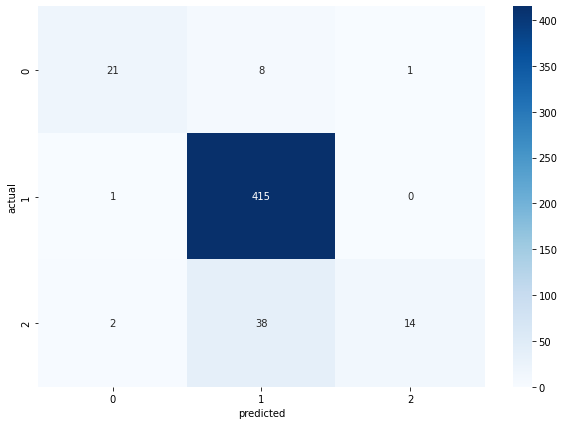

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

**CLASSIFICATION REPORT**

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.90      1.00      0.95       416
           2       0.93      0.26      0.41        54

    accuracy                           0.90       500
   macro avg       0.90      0.65      0.71       500
weighted avg       0.90      0.90      0.88       500



**BALANCING THE DATASET**

In [ ]:
df["class"].value_counts()

1    2145
2     214
0     136
3       5
Name: class, dtype: int64

In [ ]:
low=df[df["class"]==0]
medium=df[df["class"]==1]
avg=df[df["class"]==2]
high=df[df["class"]==3]

In [ ]:
n=len(medium)

In [ ]:
low_over = low.sample(n, replace=True)
avg_over = avg.sample(n, replace=True)
high_over = high.sample(n, replace=True)

In [ ]:
low_over.shape
avg_over.shape
high_over.shape

(2145, 8)

In [ ]:
data_over = pd.concat([low_over,medium,avg_over,high_over], axis=0)

In [ ]:
data_over["class"].value_counts()

1    2145
3    2145
2    2145
0    2145
Name: class, dtype: int64

In [ ]:
data_over

,process_path,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
1809,0.0,1.0,0.0,0.0,1.0,70,27.000,2
1318,0.0,1.0,0.0,0.0,1.0,40,27.000,1
859,0.0,1.0,0.0,0.0,1.0,28,18.900,0
976,0.0,1.0,0.0,0.0,1.0,55,27.000,1
2383,0.0,1.0,0.0,0.0,1.0,95,67.500,3
...,...,...,...,...,...,...,...,...
1017,0.0,1.0,0.0,0.0,1.0,22,27.000,0
1026,0.0,1.0,0.0,0.0,1.0,20,27.000,0
2109,0.0,1.0,0.0,0.0,1.0,85,57.375,2
589,0.0,1.0,0.0,0.0,1.0,28,18.900,0


In [ ]:
data_over=data_over.sample(frac=1)

In [ ]:
x=data_over.drop(["class","report_score"],axis=1)
y=data_over["class"]

In [ ]:
x.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

**SCALING THE FEATURES**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)

**SPLITTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.83333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.2       ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       ...,
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.33333333]])

**MODELS**

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)
clf.score(x_test,y_test)

0.24708624708624707

In [ ]:
#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'poly',degree=3, gamma='auto')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)
sv.score(x_test,y_test)

0.3106060606060606

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)
knn_clf.score(x_test,y_test)

0.6608391608391608

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)
y_predrf=rf.predict(x_test)
rf1.score(x_test,y_test)


0.6608391608391608

In [ ]:
# save the model to disk
filename = 'randomforest1model1.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [ ]:
#Applying logistic regression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
lr.score(x_test,y_test)


0.5775058275058275

In [ ]:
#Applying DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predlr=dt.predict(x_test)
dt.score(x_test,y_test)



0.6608391608391608

In [ ]:
filename = 'decisionmodel.pkl'
pickle.dump(rf1, open(filename, 'wb'))

In [ ]:
loaded_model_random = pickle.load(open('decisionmodel.pkl', 'rb'))
result = loaded_model_random.score(x_test, y_test)
print(result)

0.6608391608391608


**MODEL EVALUATION**

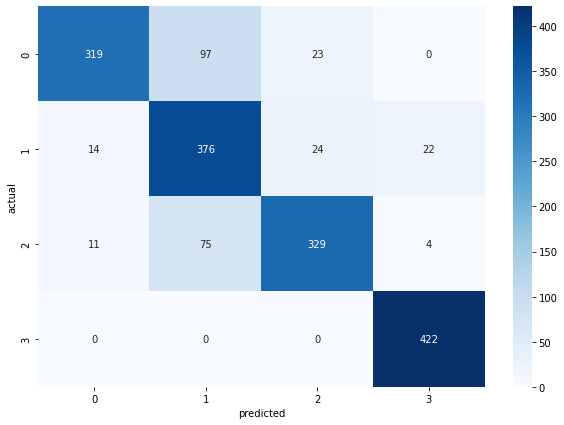

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf1.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

**CLASSIFICATION REPORT**

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.93      0.73      0.81       439
           1       0.69      0.86      0.76       436
           2       0.88      0.79      0.83       419
           3       0.94      1.00      0.97       422

    accuracy                           0.84      1716
   macro avg       0.86      0.84      0.84      1716
weighted avg       0.86      0.84      0.84      1716



**PREDICTION**

In [ ]:
loaded_model_le = pickle.load(open('labelencodermodeln1.pkl', 'rb'))


In [ ]:
loaded_model_random = pickle.load(open('randomforest1model1.pkl', 'rb'))
result = loaded_model_random.score(x_test, y_test)
print(result)

0.8426573426573427


In [ ]:
input_pred1=[["c:\windows\system32\cmd.exe","watchlist.hit.ingress.process","2019-11-29T11:58:13.296Z","d67c0501-339c-4f3c-885c-4bdf001df2fe","['carbonblack']",57.375]]

In [ ]:
input_pred=[["c:\windows\syswow64\macromed\\flash\\flashplayerupdateservice.exe","watchlist.hit.ingress.process","2019-11-29T12:18:17.856Z","CVE-2016-4235","['carbonblack']",27.0]] 

In [ ]:
def prediction(input_pred):
    inputw=pd.DataFrame(input_pred,columns =['process_path','alert_type','@timestamp','watchlist_id','tags','alert_severity'])
    edit=pd.concat([inputw,inp],axis=0)
    edit.reset_index(inplace=True, drop=True)
    edit["process_path"]=loaded_model_le.fit_transform(edit["process_path"])
    edit["alert_type"]=loaded_model_le.fit_transform(edit["alert_type"])
    edit["@timestamp"]=loaded_model_le.fit_transform(edit["@timestamp"])
    edit["watchlist_id"]=loaded_model_le.fit_transform(edit["watchlist_id"])
    edit["tags"]=loaded_model_le.fit_transform(edit["tags"])
    inputt=edit.head(1)
    print(inputt)
    return loaded_model_random.predict(inputt)
    




In [ ]:
arr=prediction(input_pred)
def classpred(arr):
  if arr==[0] :
    return "Low risk"
  elif arr==[1] :
    return "Medium risk"
  elif arr==[2] :
    return "High Risk"
  else :
    return "Critical"


   process_path  alert_type  @timestamp  watchlist_id  tags  alert_severity
0             4           0          35            29     0            27.0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
classpred(arr)

'High Risk'

In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 4.9 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 213 kB 65.8 MB/s 
     |████████████████████████████████| 272 kB 71.4 MB/s 
     |████████████████████████████████| 106 kB 63.0 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 2.3 MB 42.6 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 6.1 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 68 kB 6.3 MB/s 
     |████████████████████████████████| 46 kB 4.0 M

In [ ]:
import gradio as gr

In [ ]:
inp

,process_path,alert_type,@timestamp,watchlist_id,tags,alert_severity
0,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],27.0
1,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],27.0
2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],27.0
3,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],27.0
4,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],27.0
...,...,...,...,...,...,...
2495,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.144Z,CVE-2016-0995,['carbonblack'],27.0
2496,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-1031,['carbonblack'],27.0
2497,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0
2498,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,2019-11-27T03:12:01.143Z,CVE-2016-4284,['carbonblack'],27.0


In [ ]:
inppppp=[["c:\windows\system32\cmd.exe","watchlist.hit.ingress.process","2019-11-29T11:58:13.296Z","d67c0501-339c-4f3c-885c-4bdf001df2fe","['carbonblack']",57.375]]

In [ ]:
inp11=[["c:\windows\syswow64\macromed\\flash\\flashplayerupdateservice.exe","watchlist.hit.ingress.process","2019-11-29T12:18:17.856Z","CVE-2016-4235","['carbonblack']",27.0]]

In [ ]:
def interfacegradio(Process_Path,Alert_Type,Timestamp,Watchlist_Id,Tags,Alert_Severity):
    inp11=[Process_Path,Alert_Type,Timestamp,Watchlist_Id,Tags,Alert_Severity]
    inputw=pd.DataFrame(inp11,columns =['process_path','alert_type','@timestamp','watchlist_id','tags','alert_severity'])
    edit=pd.concat([inputw,inp],axis=0)
    edit.reset_index(inplace=True, drop=True)
    edit["process_path"]=loaded_model_le.fit_transform(edit["process_path"])
    edit["alert_type"]=loaded_model_le.fit_transform(edit["alert_type"])
    edit["@timestamp"]=loaded_model_le.fit_transform(edit["@timestamp"])
    edit["watchlist_id"]=loaded_model_le.fit_transform(edit["watchlist_id"])
    edit["tags"]=loaded_model_le.fit_transform(edit["tags"])
    inputt=edit.head(1)
    print(inputt)
    arr=loaded_model_random.predict(inputt)
    if arr==[0] :
      return "Low risk"
    elif arr==[1] :
      return "Medium risk"
    elif arr==[2] :
      return "High Risk"
    else :
      return "Critical"


In [ ]:
interface=gr.Interface(fn=interfacegradio,inputs=['text','text','text',"text","text","text"],outputs=['text'])

In [ ]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`

Using Embedded Colab Mode (NEW). If you have issues, please use share=True and file an issue at https://github.com/gradio-app/gradio/
Note: opening the browser inspector may crash Embedded Colab Mode.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

(<gradio.routes.App at 0x7f881d2ae650>, 'http://127.0.0.1:7868/', None)